# Semantic Image Guidance

This is a demonstration of the Semantic Image Editing approach for interacting with concept retained by generative text-to-image models. Find the paper in [arXiv](https://arxiv.org/abs/2212.06013) and our official implementation on [GitHub](https://github.com/ml-research/semantic-image-editing).

In [ ]:
# @title First install depencendies
!pip install git+https://github.com/ml-research/semantic-image-editing &> /dev/null
!pip install ftfy &> /dev/null

Aferwards make sure to **restart** your notebook for the import to take effect

## Setup Pipeline

In [1]:
# @title Login to HuggingFace
!huggingface-cli login
     


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


## Load Pipeline

In [4]:
from semdiffusers import SemanticEditPipeline
import torch
device='cuda'

pipe = SemanticEditPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
).to(device)
gen = torch.Generator(device=device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/617 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

## Start generating images

First we generate an image without any semantic editing to get a starting point from which we can apply our desired changes. 

  0%|          | 0/51 [00:00<?, ?it/s]

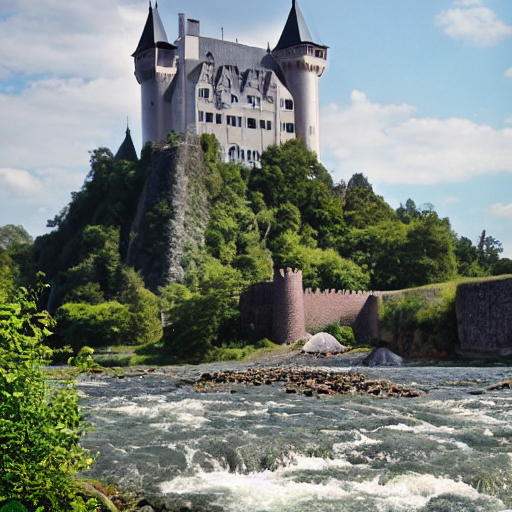

In [5]:
gen.manual_seed(48)
out = pipe(prompt='a castle next to a river', generator=gen, num_images_per_prompt=1, guidance_scale=7)
out.images[0]

And now we would like to add a boat to the river, as well as a bridge and in the style of an oilpainting.

  0%|          | 0/51 [00:00<?, ?it/s]

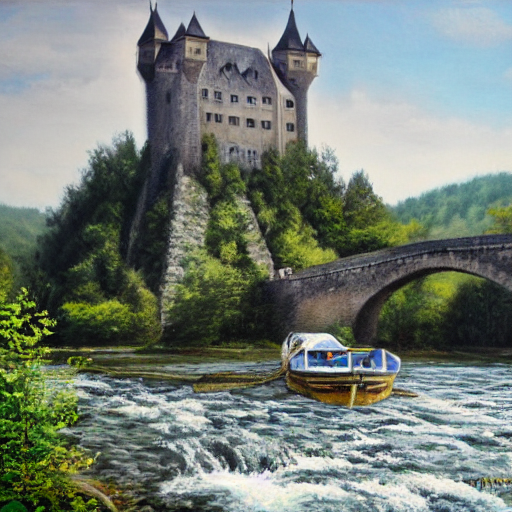

In [6]:
gen.manual_seed(48)
out = pipe(prompt='a castle next to a river', generator=gen, num_images_per_prompt=1, guidance_scale=7, 
          editing_prompt=[                                    # Concepts to apply
                    'oil painting, drawing',
                    'medieval bridge',
                    'boat on a river, boat'],
           reverse_editing_direction=[False, False, False],   # Direction of guidance
           edit_warmup_steps=[20, 10, 11],                    # Warmup period for each concept
           edit_guidance_scale=[2000, 2000, 2000],            # Guidance scale for each concept
           edit_threshold=[-0.2, -0.1, -0.1],                 # Threshold for each concept. Note that positive guidance needs negative thresholds and vice versa
           edit_weights=[1.2,1,1],                            # Weights of the individual concepts against each other
           edit_momentum_scale=0.25,                          # Momentum scale that will be added to the latent guidance
           edit_mom_beta=0.6,                                 # Momentum beta
           )
out.images[0]